# Data Analytics Student Depression Analysis Project

## Import Libraries

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read Data

In [103]:
df = pd.read_csv("C:/Users/Admin/Desktop/DataAnalytics/student-depression-analysis/data/raw_data/student_depression_dataset.csv")

In [104]:
df.head(2)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0


In [105]:
df.tail(2)


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1
27900,140699,Male,27.0,Patna,Student,4.0,0.0,9.24,1.0,0.0,'Less than 5 hours',Healthy,BCA,Yes,2.0,3.0,Yes,1


## Creating Copy Of Data

In [106]:
original_df=df.copy()

In [107]:
original_df.head(2)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0


## Dataset Structure and Overview

In [108]:
df.shape

(27901, 18)

In [109]:
print(df.columns)

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')


In [110]:
df.dtypes

id                                         int64
Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                          object
Family History of Mental Illness          object
Depression                                 int64
dtype: object

In [111]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


### Checking for Duplicate Values

In [112]:
df.duplicated().sum()


np.int64(0)

## Checking the columns

In [113]:
print(df['Gender'].unique())
#print(df['City'].unique())
#print(df['Profession'].unique())
#print(df['Academic Pressure'].unique())
#print(df['Work Pressure'].unique())
#print(df['Study Satisfaction'].unique())
#print(df['Job Satisfaction'].unique())
#print(df['Sleep Duration'].unique())
#print(df['Dietary Habits'].unique())
#print(df['Degree'].unique())
#print(df['Have you ever had suicidal thoughts ?'].unique())
#print(df['Work/Study Hours'].unique())
#print(df['Financial Stress'].unique())
print(df['Family History of Mental Illness'].unique())
#print(df['Depression'].unique())

['Male' 'Female']
['No' 'Yes']


### Removing Unwanted Records

In [114]:
# Remove all record which contains city which are not the cities
remove=('3.0','Saanvi','M.Tech','Bhavna',"'Less Delhi'",'City',
"'Less than 5 Kalyan'",'Mira','Harsha','Vaanya','Gaurav','Harsh',
'Reyansh','Kibara','Rashi','ME','M.Com','Nalyan','Mihir','Nalini','Nandini')
df = df.drop(df[df['City'].isin(remove)].index)
df.shape[0]

27876

In [115]:
# Remove all non-student records as there is analysis of student only
df = df.drop(df[df['Profession'] != 'Student'].index)
df.shape[0]

27845

In [116]:
# Remove all records which contains Others in dietary habits
df = df.drop(df[df['Dietary Habits']=='Others'].index)
df.shape[0]

27833

In [117]:
# Remove all records of finantial stress which contains ?
df = df.drop(df[df['Financial Stress'] == '?'].index)
df.shape[0]

27830

In [118]:
# Check remaining records
print("Remaining records:", df.shape[0])

Remaining records: 27830


### Replace The Values

In [119]:
df['City'] =df['City'].replace({'Khaziabad':'Ghaziabad'})

In [120]:
print(df['City'].unique())

['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi']


In [121]:
# replace class 12th degree with HSC
df['Degree'] =df['Degree'].replace({"'Class 12'":'HSC'})

In [122]:
print(df['Degree'].unique())


['B.Pharm' 'BSc' 'BA' 'BCA' 'M.Tech' 'PhD' 'HSC' 'B.Ed' 'LLB' 'BE' 'M.Ed'
 'MSc' 'BHM' 'M.Pharm' 'MCA' 'MA' 'B.Com' 'MD' 'MBA' 'MBBS' 'M.Com'
 'B.Arch' 'LLM' 'B.Tech' 'BBA' 'ME' 'MHM' 'Others']


In [123]:
# replace 1 with yes and 0 with no
df['Depression'] =df['Depression'].replace({0:'No',1:'Yes'})

In [124]:
print(df['Depression'].unique())

['Yes' 'No']


### Deleting the Unnecessary Columns 

In [125]:
# Drop columns like id, Professions, Work Pressure, Job Satisfaction
df=df.drop(columns=['id','Profession','Work Pressure','Job Satisfaction'])
df.shape[1]

14

In [126]:
df.columns

Index(['Gender', 'Age', 'City', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

### Rename Columns

In [127]:
#Rename the column Work/Study hours
df=df.rename(columns={'Work/Study Hours':'Study Hours'})

In [128]:
#Rename the column Work/Study hours
df=df.rename(columns={'Have you ever had suicidal thoughts ?':'Suicidal Thoughts'})

In [129]:
df.columns

Index(['Gender', 'Age', 'City', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Suicidal Thoughts', 'Study Hours', 'Financial Stress',
       'Family History of Mental Illness', 'Depression'],
      dtype='object')

### Converting the datatypes 

In [130]:
df.dtypes

Gender                               object
Age                                 float64
City                                 object
Academic Pressure                   float64
CGPA                                float64
Study Satisfaction                  float64
Sleep Duration                       object
Dietary Habits                       object
Degree                               object
Suicidal Thoughts                    object
Study Hours                         float64
Financial Stress                     object
Family History of Mental Illness     object
Depression                           object
dtype: object

In [131]:
# Convert the datatypes from float to int
df[['Age', 'Academic Pressure', 'Study Satisfaction', 'Study Hours']]=df[['Age', 'Academic Pressure', 'Study Satisfaction', 'Study Hours']].astype('Int64')

In [132]:
# Round up the CGPA value upto two decimal points
df['CGPA']=df['CGPA'].round(2)

In [133]:
# To convert the column finantial stress datatype from object to int
df['Financial Stress'] = df['Financial Stress'].astype(float).astype('Int64')

In [134]:
df.dtypes

Gender                               object
Age                                   Int64
City                                 object
Academic Pressure                     Int64
CGPA                                float64
Study Satisfaction                    Int64
Sleep Duration                       object
Dietary Habits                       object
Degree                               object
Suicidal Thoughts                    object
Study Hours                           Int64
Financial Stress                      Int64
Family History of Mental Illness     object
Depression                           object
dtype: object

## Graphical Representation

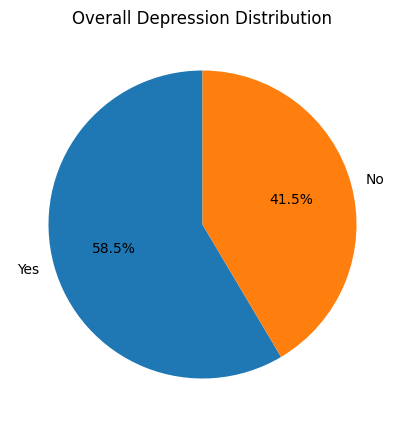

In [135]:
depression_counts = df['Depression'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(depression_counts, labels=depression_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Overall Depression Distribution")
plt.show()

#### From the above we come to know that approximately 60% students are suffering from the depression.

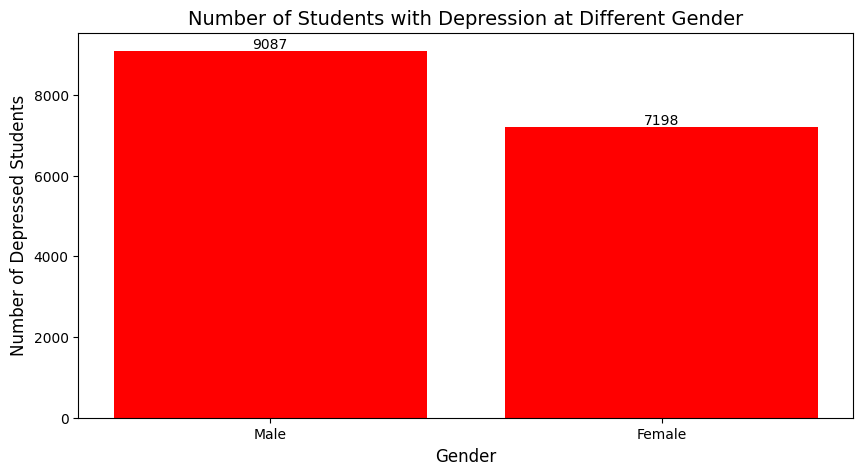

In [136]:
df_yes = df[df['Depression'] == 'Yes']
gender_counts = df_yes['Gender'].value_counts()

plt.figure(figsize=(10,5))
bars=plt.bar(gender_counts.index, gender_counts.values, color="red")
plt.bar_label(bars)
plt.title("Number of Students with Depression at Different Gender", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Number of Depressed Students", fontsize=12)
plt.xticks(rotation=0)

plt.show()


#### Out of 27,830 students, around 16,285 students reported as they are suffering from depression, with males (9,087) being more than females (7,198). This shows that depression is a common issue in both genders, but relatively higher among males.

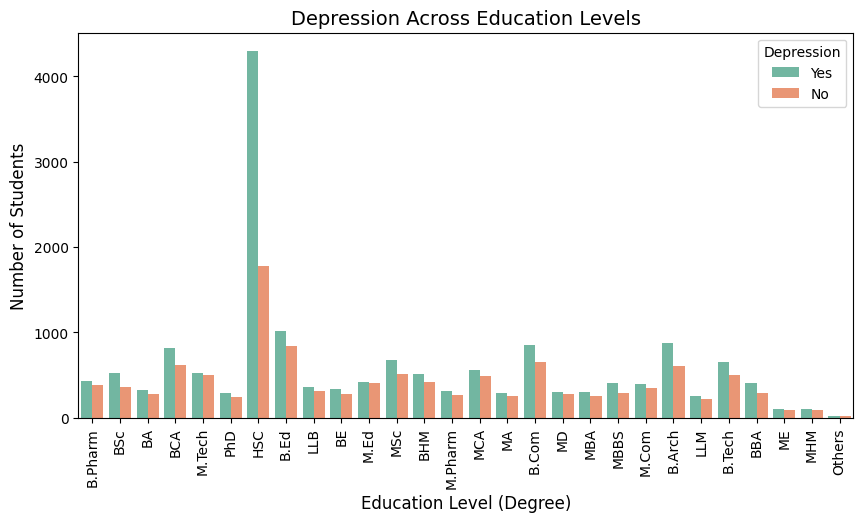

In [137]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Degree', hue='Depression', palette='Set2')
plt.title("Depression Across Education Levels", fontsize=14)
plt.xlabel("Education Level (Degree)", fontsize=12)
plt.ylabel("Number of Students", fontsize=12)
plt.xticks(rotation=90)  
plt.legend(title="Depression")  
plt.show()

#### The graph shows that depression is distributed across all education levels, but the levels differ. Students in HSC (Class 12th) report the highest depression, the academic pressure at this stage may strongly affect mental health. Also we cant say clearly about the depresssion level in other education level as there are less records are there.

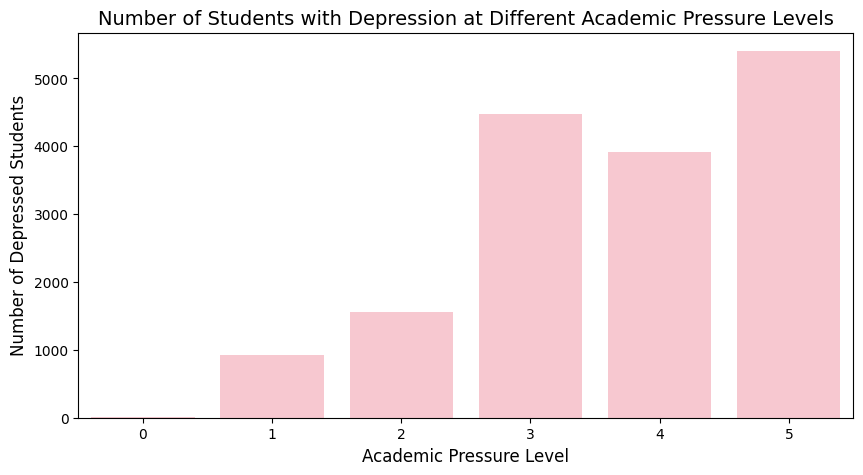

In [138]:
df_yes = df[df['Depression'] == 'Yes']
plt.figure(figsize=(10,5))
sns.countplot(data=df_yes, x='Academic Pressure', color="pink")
plt.title("Number of Students with Depression at Different Academic Pressure Levels", fontsize=14)
plt.xlabel("Academic Pressure Level", fontsize=12)
plt.ylabel("Number of Depressed Students", fontsize=12)
plt.xticks(rotation=0)
plt.show()

#### The above graph is an evident that students experiencing higher levels of academic pressure (4 and 5) are more likely to report depression compared to those with lower pressure levels. This suggests a strong positive correlation between academic pressure and depression.

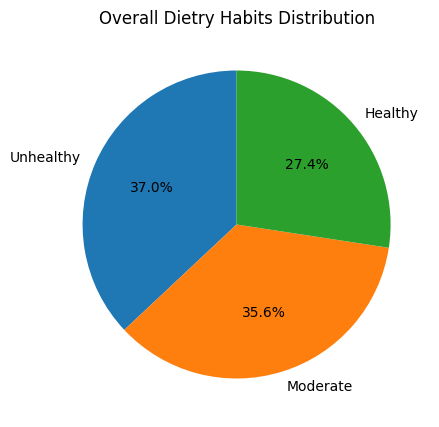

In [139]:
dietary_habits = df['Dietary Habits'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(dietary_habits, labels=dietary_habits.index, autopct='%1.1f%%', startangle=90)
plt.title("Overall Dietry Habits Distribution")
plt.show()

#### From the above chart, it can be observed that the majority of students follow unhealthy (37%) and moderate (35.6%) dietary habits, while only 27.4% of students maintain a healthy diet. This indicates that a significant portion of students may not have ideal dietary practices, which could contribute to stress.

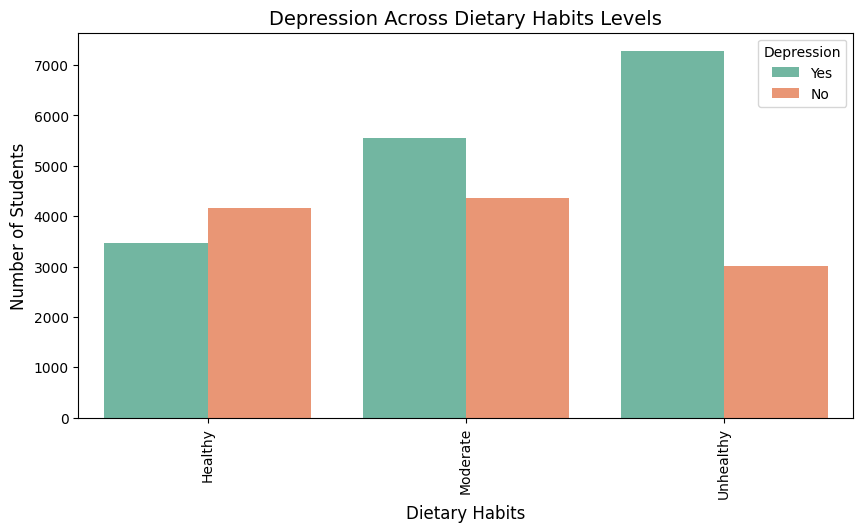

In [140]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Dietary Habits', hue='Depression', palette='Set2')
plt.title("Depression Across Dietary Habits Levels", fontsize=14)
plt.xlabel("Dietary Habits", fontsize=12)
plt.ylabel("Number of Students", fontsize=12)
plt.xticks(rotation=90)
plt.legend(title="Depression") 
plt.show()

#### The chart clearly shows that students with unhealthy dietary habits and moderate dietary habits have the highest number of depression cases. On the other hand, students with healthy diets show fewer cases of depression, and in fact, a larger proportion of them report no depression

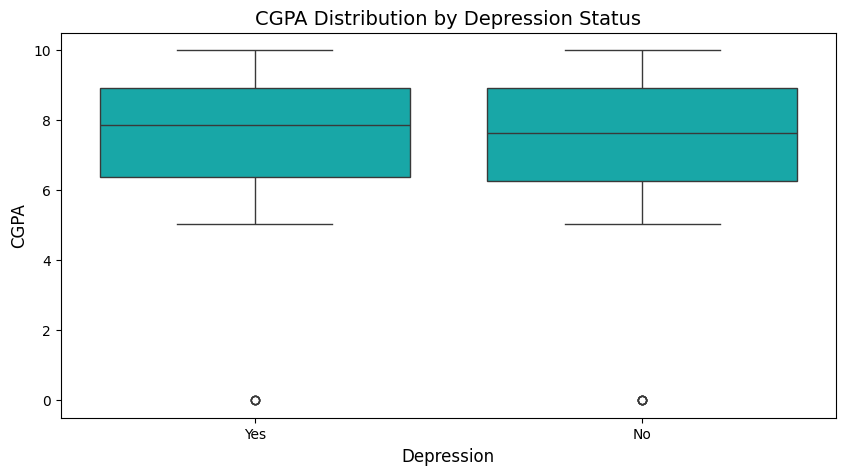

In [141]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Depression', y='CGPA',color="c")

plt.title("CGPA Distribution by Depression Status", fontsize=14)
plt.xlabel("Depression", fontsize=12)
plt.ylabel("CGPA", fontsize=12)
plt.show()


#### CGPA distribution is almost the same for students with and without depression.

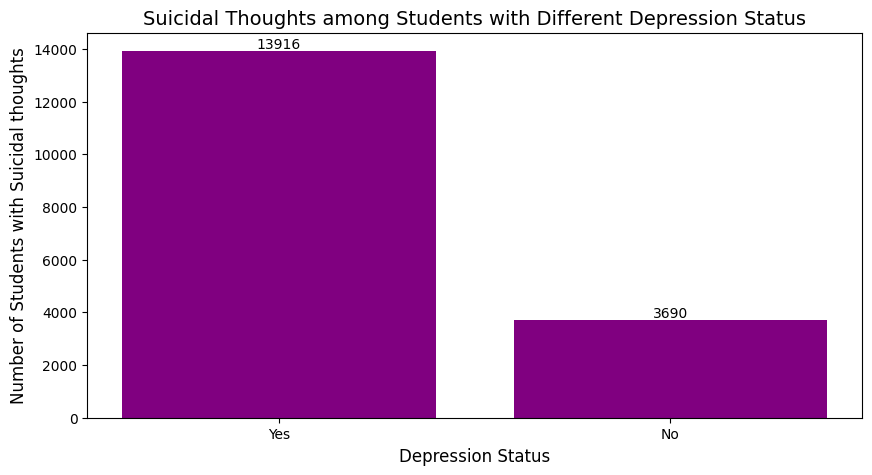

In [142]:
df_yes = df[df['Suicidal Thoughts'] == 'Yes']
depression_counts = df_yes['Depression'].value_counts()
plt.figure(figsize=(10,5))
bars=plt.bar(depression_counts.index, depression_counts.values, color="purple")
plt.bar_label(bars)
plt.title("Suicidal Thoughts among Students with Different Depression Status", fontsize=14)
plt.xlabel("Depression Status", fontsize=12)
plt.ylabel("Number of Students with Suicidal thoughts", fontsize=12)
plt.show()

#### The chart shows that students with depression are much more likely to experience suicidal thoughts compared to students without depression. This highlights a strong link between depression and suicidal thoughts.

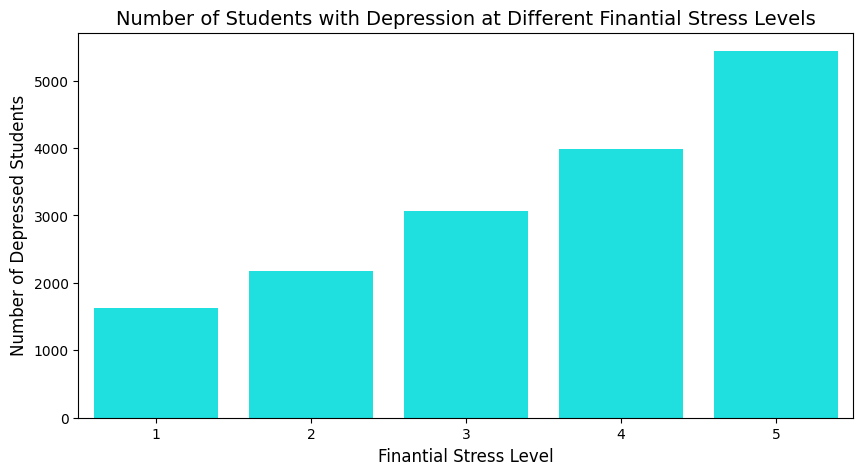

In [143]:
df_yes = df[df['Depression'] == 'Yes']
plt.figure(figsize=(10,5))
sns.countplot(data=df_yes, x='Financial Stress',color="aqua")
plt.title("Number of Students with Depression at Different Finantial Stress Levels", fontsize=14)
plt.xlabel("Finantial Stress Level", fontsize=12)
plt.ylabel("Number of Depressed Students", fontsize=12)
plt.show()

#### The graph shows that as financial stress levels increase, the number of students experiencing depression also increases. Students with the highest financial stress are the most likely to suffer from depression.

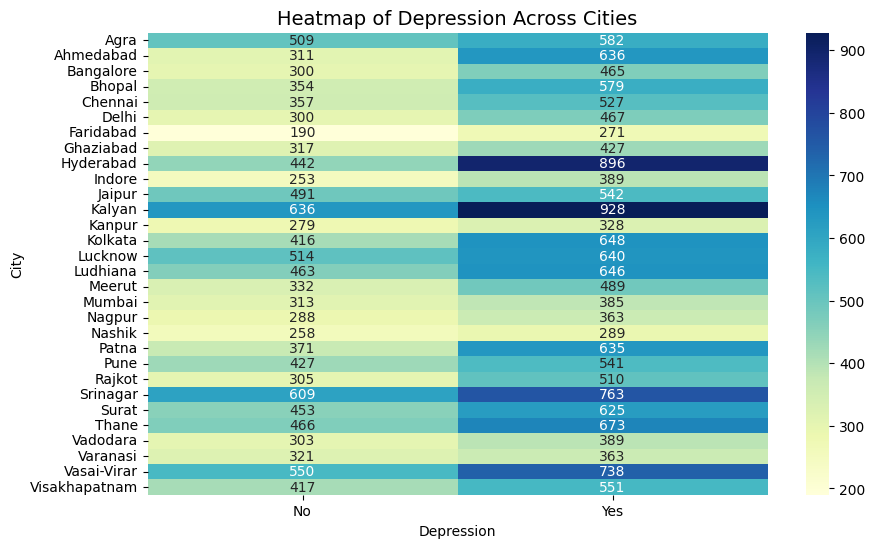

In [144]:
city_depression = df.groupby(['City', 'Depression']).size().unstack(fill_value=0)
plt.figure(figsize=(10,6))
sns.heatmap(city_depression, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Depression Across Cities", fontsize=14)
plt.xlabel("Depression")
plt.ylabel("City")
plt.show()

#### The above heatmap shows the number of students with and without depression across different cities. Cities like Hyderabad, Kalyan, and Srinagar have the highest number of students reporting depression, while cities like Faridabad, Nagpur, and Nashik show relatively fewer cases.

In [ ]:
satisfaction_depression = df.groupby(['Study Satisfaction', 'Depression']).size().unstack(fill_value=0)
plt.figure(figsize=(6,4))
sns.heatmap(satisfaction_depression, annot=True, fmt="d", cmap="YlOrRd")
plt.title("Heatmap of Depression vs Study Satisfaction", fontsize=14)
plt.xlabel("Depression")
plt.ylabel("Study Satisfaction")
plt.show()

#### The heatmap shows the relationship between study satisfaction and depression. Students with low study satisfaction (levels 1–2) report higher depression compared to those with higher satisfaction. As study satisfaction increases (levels 4–5), the number of depressed students decreases, indicating that better study satisfaction is linked to lower depression levels.

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Sleep Duration', hue='Depression',palette="Set3",multiple="stack")
plt.title("Sleep Duration vs Depression", fontsize=14)
plt.xlabel("Sleep Duration", fontsize=12)
plt.ylabel("Number of Students", fontsize=12)
plt.xticks(rotation=45)
plt.show()

## The above graph shows student who having sleep time less than 5 hours report higher depression on the other hand students having sleep time more that 8 hours have the less stress.

In [ ]:
plt.figure(figsize=(10,5))
ax=sns.countplot(data=df, x='Family History of Mental Illness', hue='Depression', palette="Set2")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Depression vs Family History of Mental Illness", fontsize=14)
plt.xlabel("Family History of Mental Illness", fontsize=12)
plt.ylabel("Number of Students", fontsize=12)
plt.show()


#### We can't say directly like that the students who having the family history of mental illness will have more depression because the students having no family history of mental illness also have approximately same level of depression.

In [ ]:
df

### Save the cleaned data.

In [ ]:
df.to_csv("C:/Users/Admin/Desktop/DataAnalytics/student-depression-analysis/data/processed_data/cleaned_data.csv", index=False)